# Exploring US Newspapers with the Chronicling America API

*Created by Isaac Wink (isaac.wink@uky.edu) and available for reuse under a CC-BY license*

This notebook and the accompanying workshop aim to:
*   Introduce participants to the Chronicling America database for accessing historical newspapers
*   Introduce participants to the concept of API's as a way of accessing data
*   Engage participants in exploratory analysis of newspaper textual data through basic text mining techniques

# Before You Begin

In order to be able to edit this notebook and run the code, you will first need to make your own copy. To do so, click **File**, then select **Save a copy in Drive**. You will be able to edit and run code in your copied version of this file.

# A Note on Language

Historical newspapers, as with any other part of the historical record, reflect the views of their creators, including views that readers may find harmful or offensive. While the intent of this resource is to provide users with an opportunity to explore a wide variety of topics, they should be aware that depending on their search parameters, they may come across harmful or offensive language.

# Chronicling America from the Library of Congress

Produced by the National Digital Newspaper Project, [Chronicling America](https://chroniclingamerica.loc.gov/about/) (NDNP) is a database of digitized newspapers that spans both time and geography. It gives researchers, students, and the rest of the public a unique and free window into the history of society, culture, and politics in the United States.

The University of Kentucky Libraries was part of the NDNP from 2005-2013 and has contributed more than 400,000 pages from 79 Kentucky newspapers. It was [recently awarded another grant](https://libraries.uky.edu/news/uk-libraries-awarded-fifth-national-digital-newspaper-program-ndnp-grant) and is now adding 100,000 more pages.

While only a portion of all newspaper issues have been digitized and made publicly available through Chronicling America, the Library of Congress offers a [U.S. newspaper directory](https://chroniclingamerica.loc.gov/search/titles/) for identifying newspapers published since 1690 and provides information on where researchers can access them.

All newspapers included in Chronicling America are [believed to be in the public domain](https://www.loc.gov/item/2007618519/), but some more recent contributions may include some copyrighted material. All content from newspapers published more than 95 years ago (1929 and before as of 2024) is fully in the public domain.

# Exploring Chronicling America Papers through Visualizations

Data visualizations give users a top-level view of a collection and can help them notice specific trends. In the case of Chronicling America, the following visualizations can be helpful for identifying locations, time periods, and perspectives of interest that a researcher may want to examine further:

* [The map of all digitized titles](https://loc.maps.arcgis.com/apps/instant/media/index.html?appid=3c6a392554d545bdb1c083348ef56458&center=-97.5126;39.6376&level=3) is useful for identifying papers from a particular town or region. Clicking on a dot representing a paper provides more information about its coverage in Chronicling America.

* [The temporal state coverage map](https://public.tableau.com/app/profile/chronicling.america/viz/ChroniclingAmericaTemporalCoveragebyStateMap/TemporalStateCoverage) provides information about how many digitized issues states have from given time periods. Focusing on Kentucky, for example, shows that a significant number of issues in the collection are from 1900-1910.

* [The ethnic press coverage map](https://public.tableau.com/app/profile/chronicling.america/viz/ChroniclingAmericaEthnicPressCoverageMap/ethnicity_map) can help identify newspapers with particular racial or ethnic perspectives.

# Searching News Pages

[Access the Chronicling America search interface here.](https://chroniclingamerica.loc.gov/search/titles/) The results of the search will always be individaul pages of newspaper issues.

One of the most powerful aspects of Chronicling America is that all the newspapers included in the collection are available for full-text searching. The teams digitizing the newspaper issues use [optical character recognition (OCR)](https://chroniclingamerica.loc.gov/ocr/) to convert printed text into machine-readable text. OCR is not perfect and frequently leads to errors, especially for older and worn pages of text, but it is still a very powerful tool for locating content within historical text sources.

The simple options for searching for specific terms in news pages include limiting the scope of pages returned by state and date of publication. Most searches of just a few words will return hundreds of pages, many of them not relevant to the topic you might be trying to find. On the other hand, adding too many search terms will return no or few results.

The advanced search options can help solve this problem. In addition to limiting your search to a particular time period and state, you can also:

* Search only a specific newspaper.
* Search a more specifc period of time or even a single date.
* Search only the front pages of newspapers. This can be useful for identifying literal front-page news. For example, [searching front pages of issues published September 15, 1901](https://chroniclingamerica.loc.gov/search/pages/results/?state=&lccn=&dateFilterType=range&date1=9%2F15%2F1901&date2=9%2F15%2F1901&sequence=1&language=&ortext=&andtext=&phrasetext=&proxtext=&proxdistance=5&rows=20&searchType=advanced) allows you to browse coverage of the death of President William McKinley, which took place the day before.
* Tweak the specificity of your search terms by searching for pages that include any of your chosen terms, include all the terms in a row (as part of a phrase), include all the terms but not necessarily as part of a phrase, or include your terms within a certain distance from one another. This last parameter can be particularly useful for searching names of historical figures. For example, searching for pages that have the words "Abraham" and "Lincoln" anywhere in them might return many pages referencing counties or towns named Lincoln and also happen to mention a person named Abraham. Specifiying that the words "Abraham" and "Lincoln" should occur within five words of each other will return more useful results.

# Accessing News Pages in PDF or Text Format

In addition to viewing a news page as an image, you can also select to view (and download it) as a PDF or plain text. The "Text" link takes you to a page containing the OCR text that was created when the page was digitized. [Take a look](https://chroniclingamerica.loc.gov/lccn/sn84020558/1901-09-15/ed-1/seq-1/ocr/) at one of the pages of OCR text to get a sense of how frequently errors can occur.

# Breaking Down the Search Result URL

You may have noticed that the webpage containing your search results has a very long URL. That URL contains a lot of useful information! Let's examine the URL for a search of all news pages published in Kentucky containing the phrase "University of Kentucky":

```
https://chroniclingamerica.loc.gov/search/pages/results/?state=Kentucky&lccn=&dateFilterType=yearRange&date1=&date2=&language=&ortext=&andtext=&phrasetext=University+of+Kentucky&proxtext=&proxdistance=5&rows=20&searchType=advanced
```

The first part of the URL, ```https://chroniclingamerica.loc.gov/search/pages/results/?```, begins every search result URL. Everything that follows represents the machine-readable version of a search. All of these search fields (or parameters) are formatted as ```[search_parameter]=[search_value]```, and they are joined to one another with a ```&``` sign. The URL is so long because all possible parameters one could use to modify their search are included in the URL, even if the user didn't utilize them. But we can see the inclusion of the two search fields we utilized in our search:

* ```state=Kentucky``` limits the search results to only newspapers published in Kentucky.
* ```phrasetext=University+of+Kentucky``` limits the search to only pages containing the consecutive words "University of Kentucky". In the URL, the individual words are joined by a ```+``` sign.

We can also see that some values are included that we didn't explicitly enter when we searched. For example, ```rows=20``` limits our search results to 20 news pages per page.

It is possible to change your search by editing the URL directly. Look at the URL below and try to predict what it will search for, then paste it into a new window to see the results:

```https://chroniclingamerica.loc.gov/search/pages/results/?state=Kentucky&dateFilterType=yearRange&date1=1900&date2=1910&phrasetext=University+of+Kentucky```

Some search fields, like ```state```, have a limited number of possible values. What do you think will happen if you add an incorrect value to the URL and try searching?

```https://chroniclingamerica.loc.gov/search/pages/results/?state=Canada&phrasetext=University+of+Kentucky```


# Using the Chronicling America API for Text Mining

Understanding the structure of a search result URL is useful context for utilizing the [Chronicling America API](https://chroniclingamerica.loc.gov/about/api/). An API (which stands for Application Programming Interface) is a controlled access point that allows computers to communicate with one another. In this case, the Chronicling America API is a structured URL that enables users to request specific data. You can think of an API as the opposite of a user interface, such as the set of search boxes we previously used to find news pages. A user interface communicates information between a human and a computer program, while an API communicates information between programs.

Using the Python programming language and the Chronicling America API, we can access and manipulate textual data from news pages.

In [ ]:
# Press the Play button next to this cell to run the code contained within it
import requests

URL = "https://chroniclingamerica.loc.gov/lccn/sn85066387/1901-09-14/ed-1/seq-1/ocr.txt"

chron_response = requests.get(URL)

print(chron_response.text)

PRESIDENT WILLIAM M'KINLEY IS DEAD AND THE SHADOW
OF AZRAEL'S WING IS UPON THE AMERICAN PEOPLE
VOLUME XC-NO. 106.
PRICE FIVE CENTS.
SAN FRANCI^^
The San Francisco Call


We don't need to access text one page at a time. By adding ```&format=json``` to any search URL, we can receive the results in the [JSON file format](https://stackoverflow.blog/2022/06/02/a-beginners-guide-to-json-the-data-format-for-the-internet/) (a common file type for sending data between computers), which we can then transform into useful structured data. You can change the search parameters below to customize your search.

**Please Note**: Programming scripts are very powerful ways to quickly access large amounts of data, but trying to grab too much data too quickly can cause problems for the provider. If you are not careful with your code, you can accidentally send a lot of requests in a very short amount of time, which can overload a system and prevent access to other users or result in the organization blocking requests from your IP address. The code code we are running here performs a very small number of API calls, so we don't need to worry about causing problems. If you decide to write your own code, however, make sure that you are not making thousands of requests in a short span of time.

In [ ]:
#Build the URL for the Chronicling America API
state = "Kentucky"
searchTerm = "university+of+kentucky"
rows = "5"
URL = "https://chroniclingamerica.loc.gov/search/pages/results/?state=" + state + "&andtext=" + searchTerm + "&rows=" + rows + "&format=json"
print(URL)

https://chroniclingamerica.loc.gov/search/pages/results/?state=Kentucky&andtext=university+of+kentucky&rows=5&format=json


Try going to the URL above to see what the results of the request look like. While it's possible to interpret some of the information, it clearly isn't meant to be read by a human. But this JSON package is easily read by a computer. Python comes with a package known as Pandas that allows us to manipulate data in a table format (similar to Excel). We can feed the URL we built into the ```read_json()``` function in Pandas to convert the data to a form that's easier for us to use:

In [ ]:
import pandas as pd
#Read the JSON at the URL into a dataframe. This may take a minute
response_df = pd.read_json(URL)
response_df

,totalItems,endIndex,startIndex,itemsPerPage,items
0,53406,5,1,5,"{'sequence': 5, 'county': ['Madison'], 'editio..."
1,53406,5,1,5,"{'sequence': 13, 'county': ['Bourbon'], 'editi..."
2,53406,5,1,5,"{'sequence': 14, 'county': ['Bourbon'], 'editi..."
3,53406,5,1,5,"{'sequence': 8, 'county': ['Montgomery'], 'edi..."
4,53406,5,1,5,"{'sequence': 3, 'county': ['Adair'], 'edition'..."


The result of the API request is now saved as a dataframe (similar to a table in Microsoft Excel or Google Sheets), but it's not very useful yet. This is because all of the data about the news pages themselves is squeezed together in the ```items``` column. The code below will pull out the interesting data:

In [ ]:
#Pull out each page's date, title, place, and text and convert them to a dataframe
pages_dict = {"date" : [], "title" : [], "id" : [], "place" : [], "frequency" : [], "text" : []}
for item in response_df["items"]:
  pages_dict["date"].append(item["date"])
  pages_dict["title"].append(item["title"])
  pages_dict["id"].append(item["id"])
  pages_dict["place"].append(item["place_of_publication"])
  pages_dict["frequency"].append(item["frequency"])
  pages_dict["text"].append(item["ocr_eng"])

pages_df = pd.DataFrame(pages_dict)
pages_df

,date,title,id,place,frequency,text
0,19100914,The Richmond climax.,/lccn/sn86069162/1910-09-14/ed-1/seq-5/,"Richmond, Ky.",Weekly,SUPPLEMENT\nTHE RICHMOND CLIMAX\nVolume 37 Ric...
1,19130916,The Bourbon news. [volume],/lccn/sn86069873/1913-09-16/ed-1/seq-13/,"Paris, Ky.",Semiweekly,o\nThrusting Aside the Tragedy of Tradition\nT...
2,19131104,The Bourbon news. [volume],/lccn/sn86069873/1913-11-04/ed-1/seq-14/,"Paris, Ky.",Semiweekly,THE MONTHLY MAGAZINE\n6\nhis Department to ful...
3,19150707,The Mt. Sterling advocate.,/lccn/sn86069675/1915-07-07/ed-1/seq-8/,"Mt. Sterling, Ky.",Weekly,kfVf-' r\n$6.98 -$6.98\n- Genuine Palm Beach S...
4,19210726,The Adair County news. [volume],/lccn/sn86069496/1921-07-26/ed-1/seq-3/,"Columbia, Ky.",Weekly,ADAIR COUNTY NEWS\nCOLVIN FAVORS THE AMENDMENT...


We now have a collection of news pages from newspapers published in Kentucky and referencing the University of Kentucky. (Remember, this is nowhere near the complete set of results. As the ```totalItems``` column in the previous table indicates, there are more than 53,000 pages that meet the search criteria.)

## Counting Words

*The rest of this notebook will explore some of the ways you can use Python to mine text from Chronicling America data. If you are not familiar with Python, it may be challenging to follow along. However, the text mining code below will work for any set of data from the Chronicling America API. To explore some new insights in your own area of interest, go back to the codeblock above that builds the URL for the API. (For example, try changing the state or search for a different phrase.) Run that codeblock and all of the following ones to convert the data, and then run the code below here.*

When you have a large set of textual data, one interesting thing you can do with it is break the text into **tokens** (mainly individual words, but also punctuation, numbers, and other collections of characters) and count the number of times that they appear:

In [ ]:
#Install the nltk library if not already installed:
!pip install nltk

In [ ]:
#Import the Natural Language Toolkit library, which we will use to split our text into tokens
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Break text into (lowercase) tokens and build a dataframe of their counts
tokens_dict = {}
for page_text in pages_df["text"]:
  page_tokens = nltk.word_tokenize(page_text)
  for token in page_tokens:
    if token.lower() in tokens_dict.keys():
      tokens_dict[token.lower()] += 1
    else:
      tokens_dict[token.lower()] = 1
tokens_df = pd.DataFrame({"token" : tokens_dict.keys(), "count" : tokens_dict.values()})
tokens_df.sort_values(by="count", ascending=False, inplace=True)
tokens_df.reset_index(drop=True, inplace=True)
print(f'These pages contain {tokens_df.shape[0]} unique tokens')
tokens_df.head(15)

These pages contain 2424 unique tokens


,token,count
0,the,451
1,",",415
2,.,402
3,of,350
4,in,216
5,and,205
6,to,154
7,a,116
8,kentucky,106
9,that,80


Counting tokens is a good illustration of the power of OCR data. Even though there are frequent errors that can make it difficult to read individual lines or sections, OCR is accurate enough that it can reveal interesting patterns with a large enough dataset.


What do you notice about the list of tokens above? Do you think we would get similar results from any other collection of pages in the Chronicling America collection? Are there any tokens that might be unique to the search parameters included in our API call?

One interesting aspect of this table is that there are a small number of tokens that occur very frequently, but the count starts to taper off quickly. A chart can help visualize this phenomenon:


<Axes: >

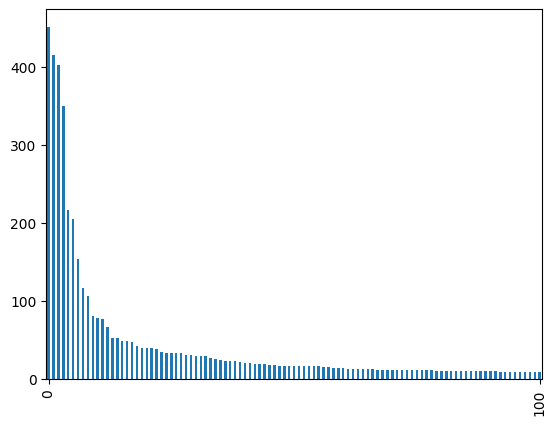

In [ ]:
top100_tokens = tokens_df.loc[0:100]
top100_tokens.plot(kind="bar", xticks=[0,100], legend=False)

This is a well-established phenomenon in working with textual data, and it's known as [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law). For any sufficiently large body of text, a relatively small number of tokens will occur very frequently, and a relatively large number of tokens will occur very infrequently (often only once).

## Using Stopwords

By counting the number of times that words appear, we can start to get a sense of what the news pages we have accessed are about. However, as we've seen, many of the most common tokens are very common in any text, like "the," "and," and punctuation. Researchers typically do not consider these tokens to be useful to understanding the content of a text, so they use a list of **stopwords**, common tokens that are removed before analyzing the text. The NLTK Python library has a list of stopwords built in that we can use to edit our dataset, but we can also add our own:

In [ ]:
#Download and import the stopwords list:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Add custom stopwords here (make sure they are inside quotation marks and separated by a comma):
custom_stopwords = [".", ",", ";", ":", "mr."]

#Drop stopwords using the nltk.corpus list
content_tokens_df = tokens_df[(tokens_df["token"].isin(stopwords.words()) == False) & (tokens_df["token"].isin(custom_stopwords) == False)]
content_tokens_df.reset_index(inplace=True, drop=True)

print(f"Removing stopwords has reduced the number of tokens from {tokens_df.shape[0]} to {content_tokens_df.shape[0]}")
content_tokens_df.head(20)

Removing stopwords has reduced the number of tokens from 2424 to 2112


,token,count
0,kentucky,106
1,state,47
2,'',29
3,``,27
4,'s,25
5,county,21
6,school,19
7,schools,19
8,$,18
9,office,17


The stock list of stopwords provided by NLTK has missed some tokens that you might want to remove from the token list. You can add additional tokens to the ```custom_stopwords``` list and run the above codeblock again.

## Exploring Ngrams

So far, we have looked at individual tokens on news pages. While there is a great deal of information to be gained about a text from its individual words, looking at tokens that appear frequently next to each other can yield new insights.

In the language of text mining, a bigram is a unit that contains two tokens together, a trigram is a unit of three tokens, and so on. These units are collectively referred to as ngrams. For example, a unit of seventeen tokens together would be called a 17-gram.

Analyzing ngrams can help better understand the context of tokens. For example, knowing that the word "pool" appears many time in a text still leaves the content of the text ambiguous, because "pool" has multiple meanings. Looking at bigrmas in the text, we might see "swimming pool" also occurs frequently, which provides additional context.

For a large-scale application of ngrams, see the [Google Ngram Viewer](https://books.google.com/ngrams/), which allows users to search for specific ngrams across the (very large) Google Books corpus.

Instead of counting individual tokens, the codeblock below will count bigrams:

In [ ]:
#Break text into (lowercase) tokens and build a dataframe of bigrams
from nltk import bigrams

bigrams_dict = {}
for page_text in pages_df["text"]:
  page_tokens = nltk.word_tokenize(page_text)
  page_bigrams = list(bigrams(page_tokens))
  for bigram in page_bigrams:
    bigram_lower = tuple([n.lower() for n in bigram])
    if bigram_lower in bigrams_dict.keys():
      bigrams_dict[bigram_lower] += 1
    else:
      bigrams_dict[bigram_lower] = 1
bigrams_df = pd.DataFrame({"bigram" : bigrams_dict.keys(), "count" : bigrams_dict.values()})
bigrams_df.sort_values(by="count", ascending=False, inplace=True)
bigrams_df.reset_index(drop=True, inplace=True)
print(f'These pages contain {bigrams_df.shape[0]} unique bigrams')
bigrams_df.head(15)

These pages contain 6386 unique bigrams


,bigram,count
0,"(of, the)",92
1,"(in, the)",53
2,"(,, and)",50
3,"(in, kentucky)",40
4,"(., i)",36
5,"(., the)",28
6,"(,, in)",24
7,"(kentucky, .)",24
8,"(., he)",24
9,"(of, kentucky)",23


Typically, counting bigrams instead of individual tokens will result in more unique bigrams, but the count for each one will be lower.

# Exploring Chronicling America Further

Now that you understand the basics of using the Chronicling America API for accessing news pages that meet certain criteria and some of the ways you can explore that text, try building your own API requests and exploring your own data! Look at the [Chronicling America API documentation](https://chroniclingamerica.loc.gov/about/api/) for ideas of additional parameters that you can set, and use them to modify the URL that you use for your API call.

**Note**: As the Chronicling America collection includes language that some will find harmful or offensive, please review any visualizations or other expressions of your data for terms you may wish to remove or contextualize.

## Additional Resources

*    If you are an experienced Python user, check out [this example list](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/content/scripts/python/python_chronam.html) from the University of Alabama for ways to build more advanced API calls and plot visualizations based on the frequency of specific keywords.
*   The Library of Congress maintains [a list of scholarship and teaching resources](https://www.loc.gov/ndnp/extras/) using Chronicling America data.
*   Learn about more digital scholarship tools from the [Digital Scholarship Research Guide](https://guides.loc.gov/digital-scholarship/resources) from the Library of Congress.

# Learn More About Text Mining

This notebook just scratches the surface of the techniques and insights used in text mining. If you would like to learn more about text mining and its applications, check out:

*   [Topic Modeling Made Just Simple Enough](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/) by Ted Underwood
*   [Getting Started with Topic Modeling and MALLET](https://programminghistorian.org/en/lessons/topic-modeling-and-mallet) by Shawn Graham, Scott Wingart, and Ian Milligan in *The Programming Historian*.
*   [Analyzing Documents with TF-IDF](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf) by Matthew J. Lavin in *The Programming Historian*.
*   [Viral Texts: Mapping Networks of Reprinting in 19th-Century Newspapers and Magazines](https://viraltexts.org/) by Ryan Cordell and David Smith.


# Chronicling America Migration

Later in 2024, the Library of Congress will be sunsetting the API used in this notebook and migrating it to the main LOC site, meaning that the API queries written here will not last forever. You can find the most recent updates on the status of the migration [here](https://guides.loc.gov/digital-scholarship/resources) and documentation for using the LOC API [here](https://www.loc.gov/apis/json-and-yaml/).